In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
from shapely.ops import unary_union
import contextily as ctx

epsg:4326
+proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


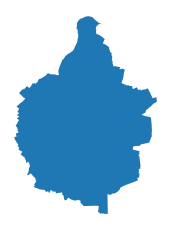

In [2]:
## Name of the map to geocode
city = ox.geocode_to_gdf("Maastricht, Netherlands")
print (city.crs)
## Project to gdf and plot. To work in local geometric km instead of angles
city = ox.project_gdf(city)
ax = city.plot()
_ = ax.axis('off')
print (city.crs)

#### Save files to shp
city.to_file("Maastricht.shp")

## Divide to grids

In [3]:
## Our city has 1 polygon
city.head()

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((685760.551 5636204.287, 685761.252 5...","Maastricht, Limburg, Netherlands, The Netherlands",50.912003,50.803805,5.762925,5.638866


In [4]:
geometry = city['geometry'].iloc[0]
print (geometry)
## Type is a ploygon
print (type(geometry))

POLYGON ((685760.5509309008 5636204.286817072, 685761.2516587683 5636200.84983997, 685789.3920496928 5636062.640079035, 685790.7104618727 5636056.119382554, 685787.3414233986 5636053.761444064, 685815.9131342713 5636013.327585123, 685838.5219819713 5635973.905173276, 685858.702354044 5635939.138200576, 685883.8248494744 5635893.494038348, 685906.3185632173 5635859.288619037, 686017.085168907 5635707.382152417, 686020.0276845722 5635703.346374216, 685988.6561770982 5635692.917545225, 685964.516620768 5635684.439677581, 685946.614886737 5635678.71199972, 685945.1434324501 5635678.470122172, 685945.6021283148 5635677.863142755, 686002.833931836 5635601.998357834, 686002.8488058846 5635601.976626198, 686061.6356720364 5635524.064105476, 685998.2102832133 5635446.7652961, 686051.7602388102 5635413.794041939, 686079.1205221831 5635396.717300822, 686089.24980113 5635390.400712766, 686099.4299736276 5635384.041437129, 686111.3977655802 5635376.577322219, 686112.5883429701 5635375.807313062, 68

In [5]:
geometry_cut = ox.utils_geo._quadrat_cut_geometry(geometry, quadrat_width = 1000)
print (type(geometry_cut))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


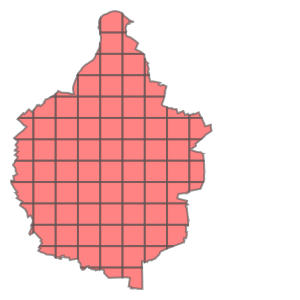

In [6]:
geometry_cut

In [7]:
polylist = [p for p in geometry_cut]

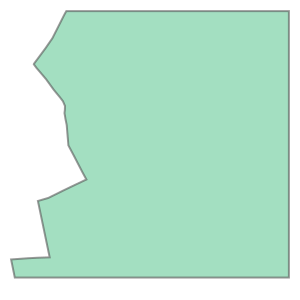

In [8]:
## Access the first poly 
polylist[0]

In [9]:
west, south, east, north = unary_union(geometry).bounds

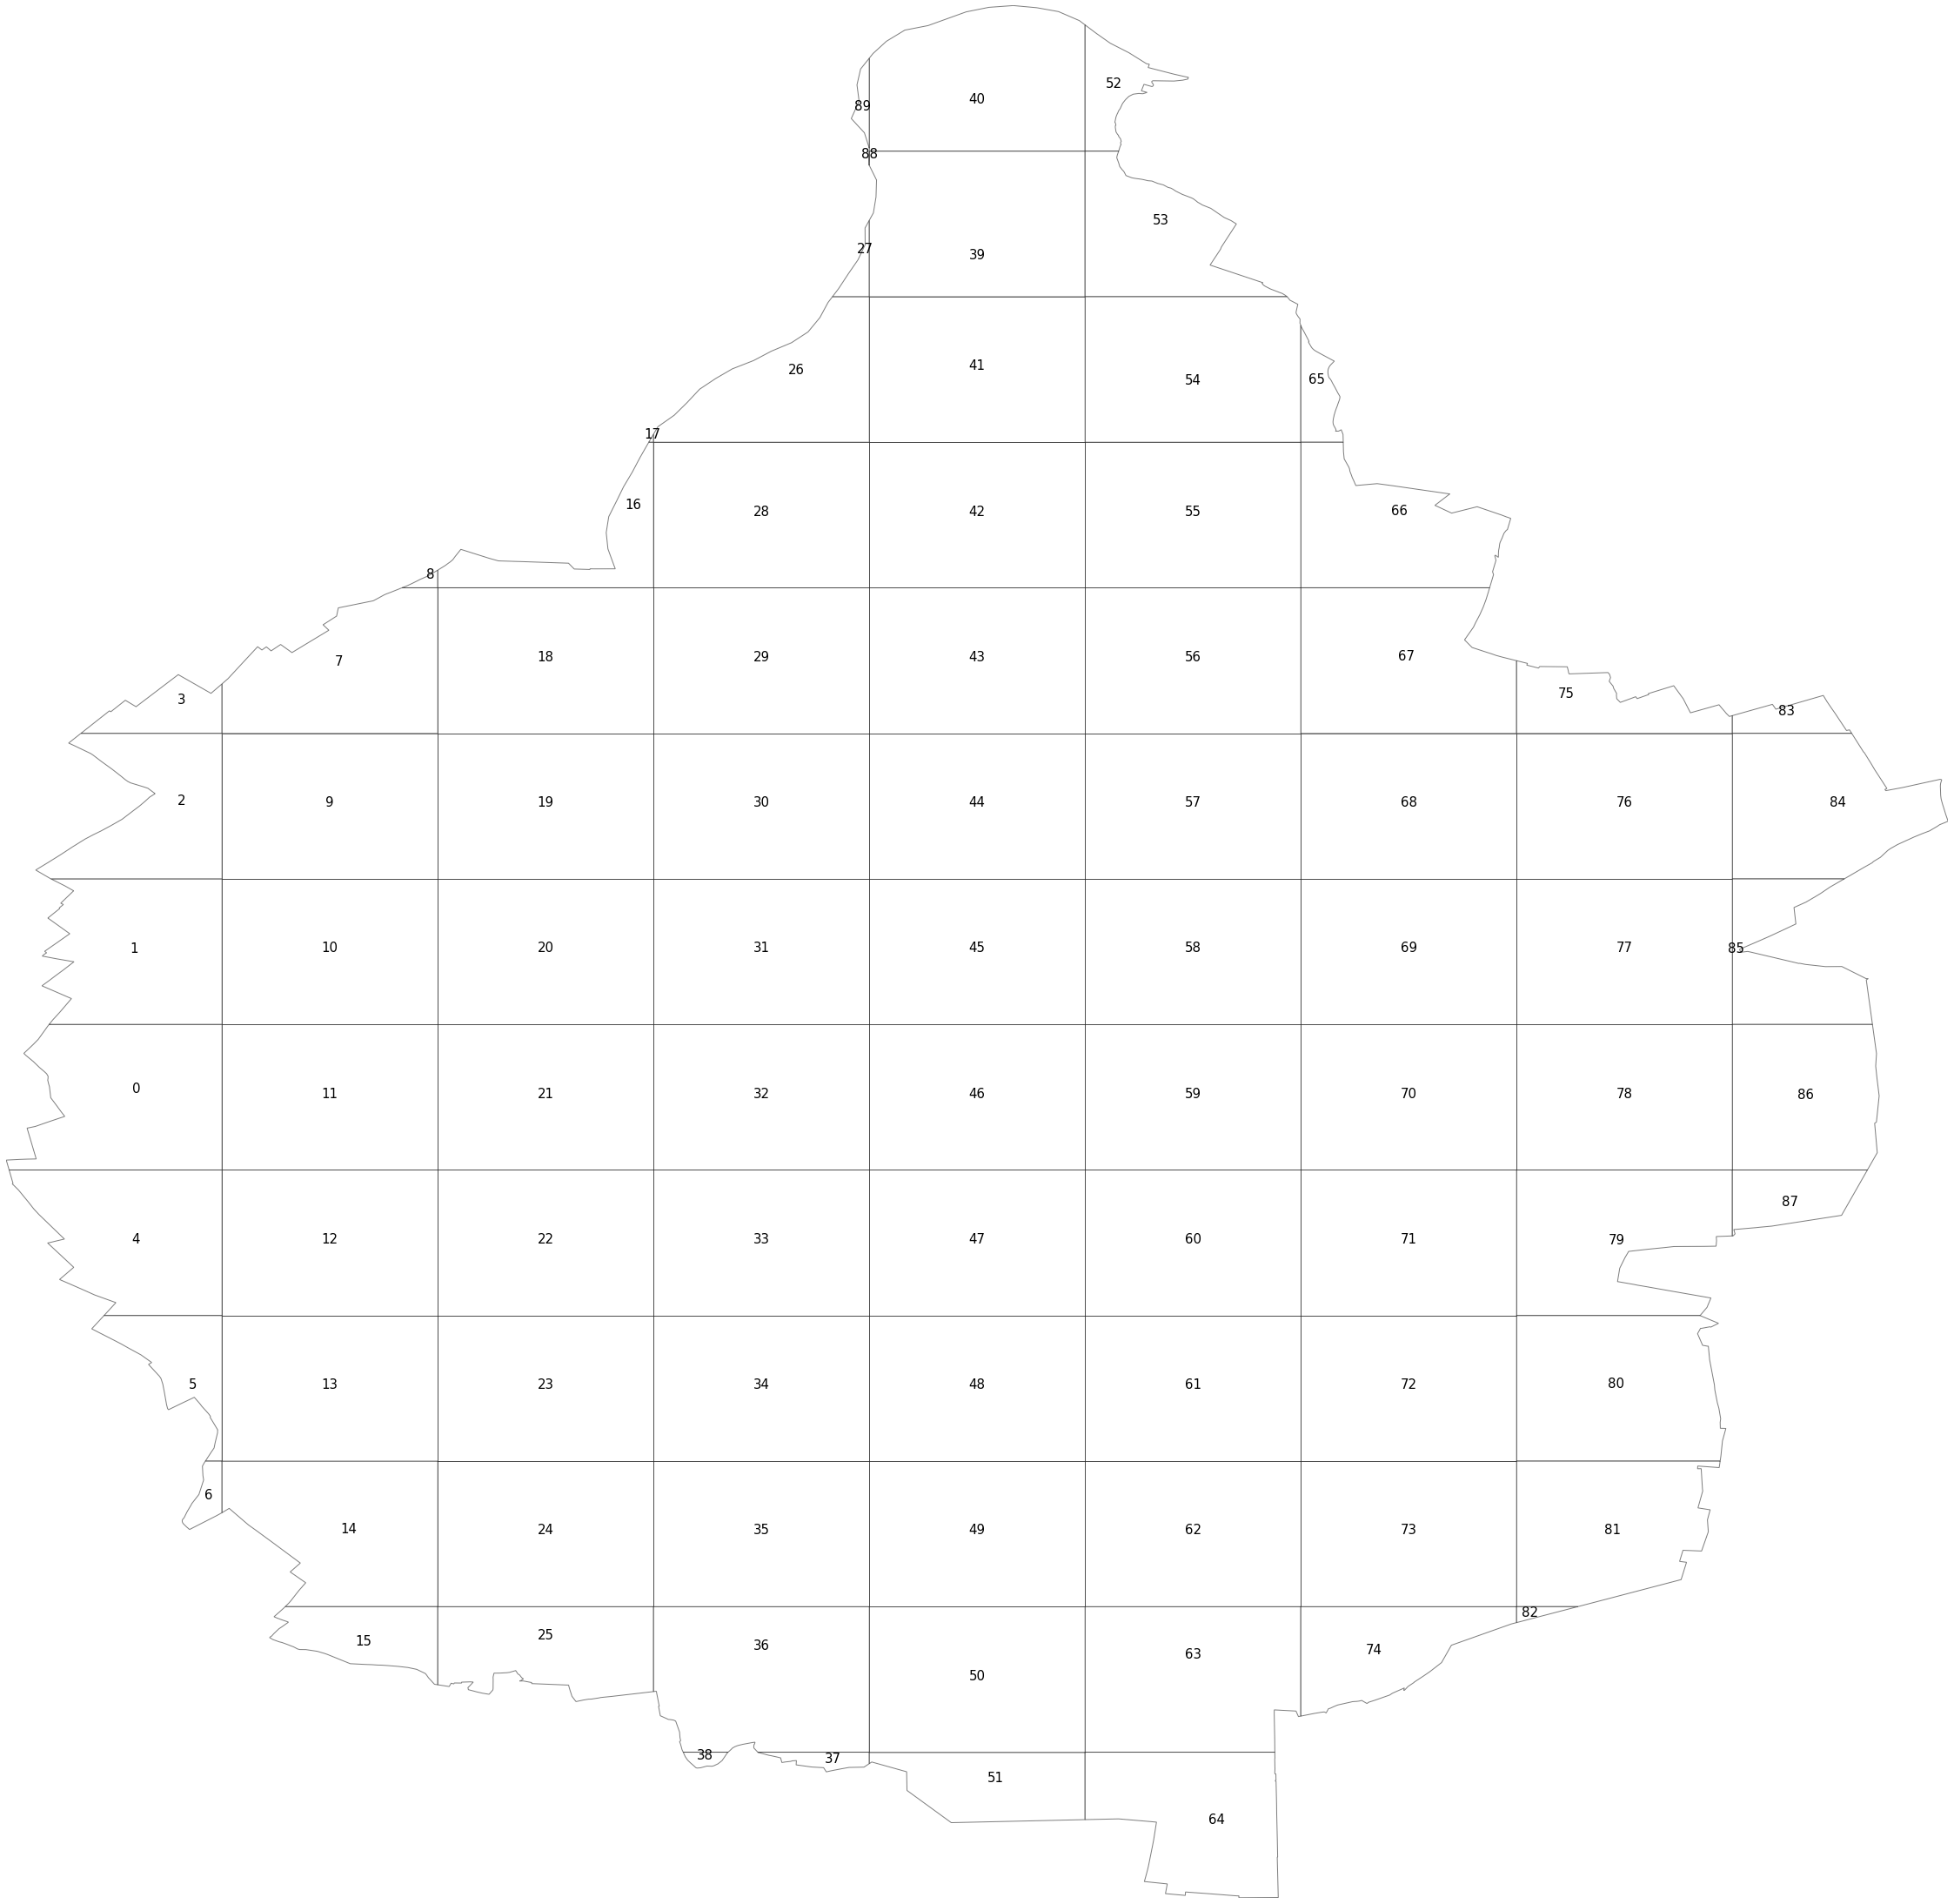

In [10]:
fig, ax = plt.subplots(figsize=(40,40))
## ax = structure of the plot
for polygon, n in zip(geometry_cut, np.arange(len(polylist))):
    p = polygon.representative_point().coords[:][0]
    ## patch polygon
    patch = PolygonPatch(polygon, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2)
    ## add the patch to the drawing
    ax.add_patch(patch)
    ## s = number to annotate here = n
    plt.annotate(text = n, xy = p, horizontalalignment='center', size = 15)

ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

In [11]:
city.crs

<Projected CRS: +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
## Create a geodataframe. collection= polygons
## Geometry is the polylist
polyframe = gpd.GeoDataFrame(geometry = polylist)
## coordinate reference = original city
polyframe.crs = city.crs
print (polyframe.crs)
polyframe.head()

+proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


,geometry
0,"POLYGON ((685760.551 5636204.287, 685820.083 5..."
1,"POLYGON ((685951.835 5637064.885, 685968.042 5..."
2,"POLYGON ((685959.928 5637988.216, 685958.244 5..."
3,"POLYGON ((686093.798 5638911.547, 686105.373 5..."
4,"POLYGON ((686723.124 5636141.554, 686723.124 5..."


In [13]:
## Number of polygons
len(polyframe)

90

(50.8038053, 50.912002799999996)

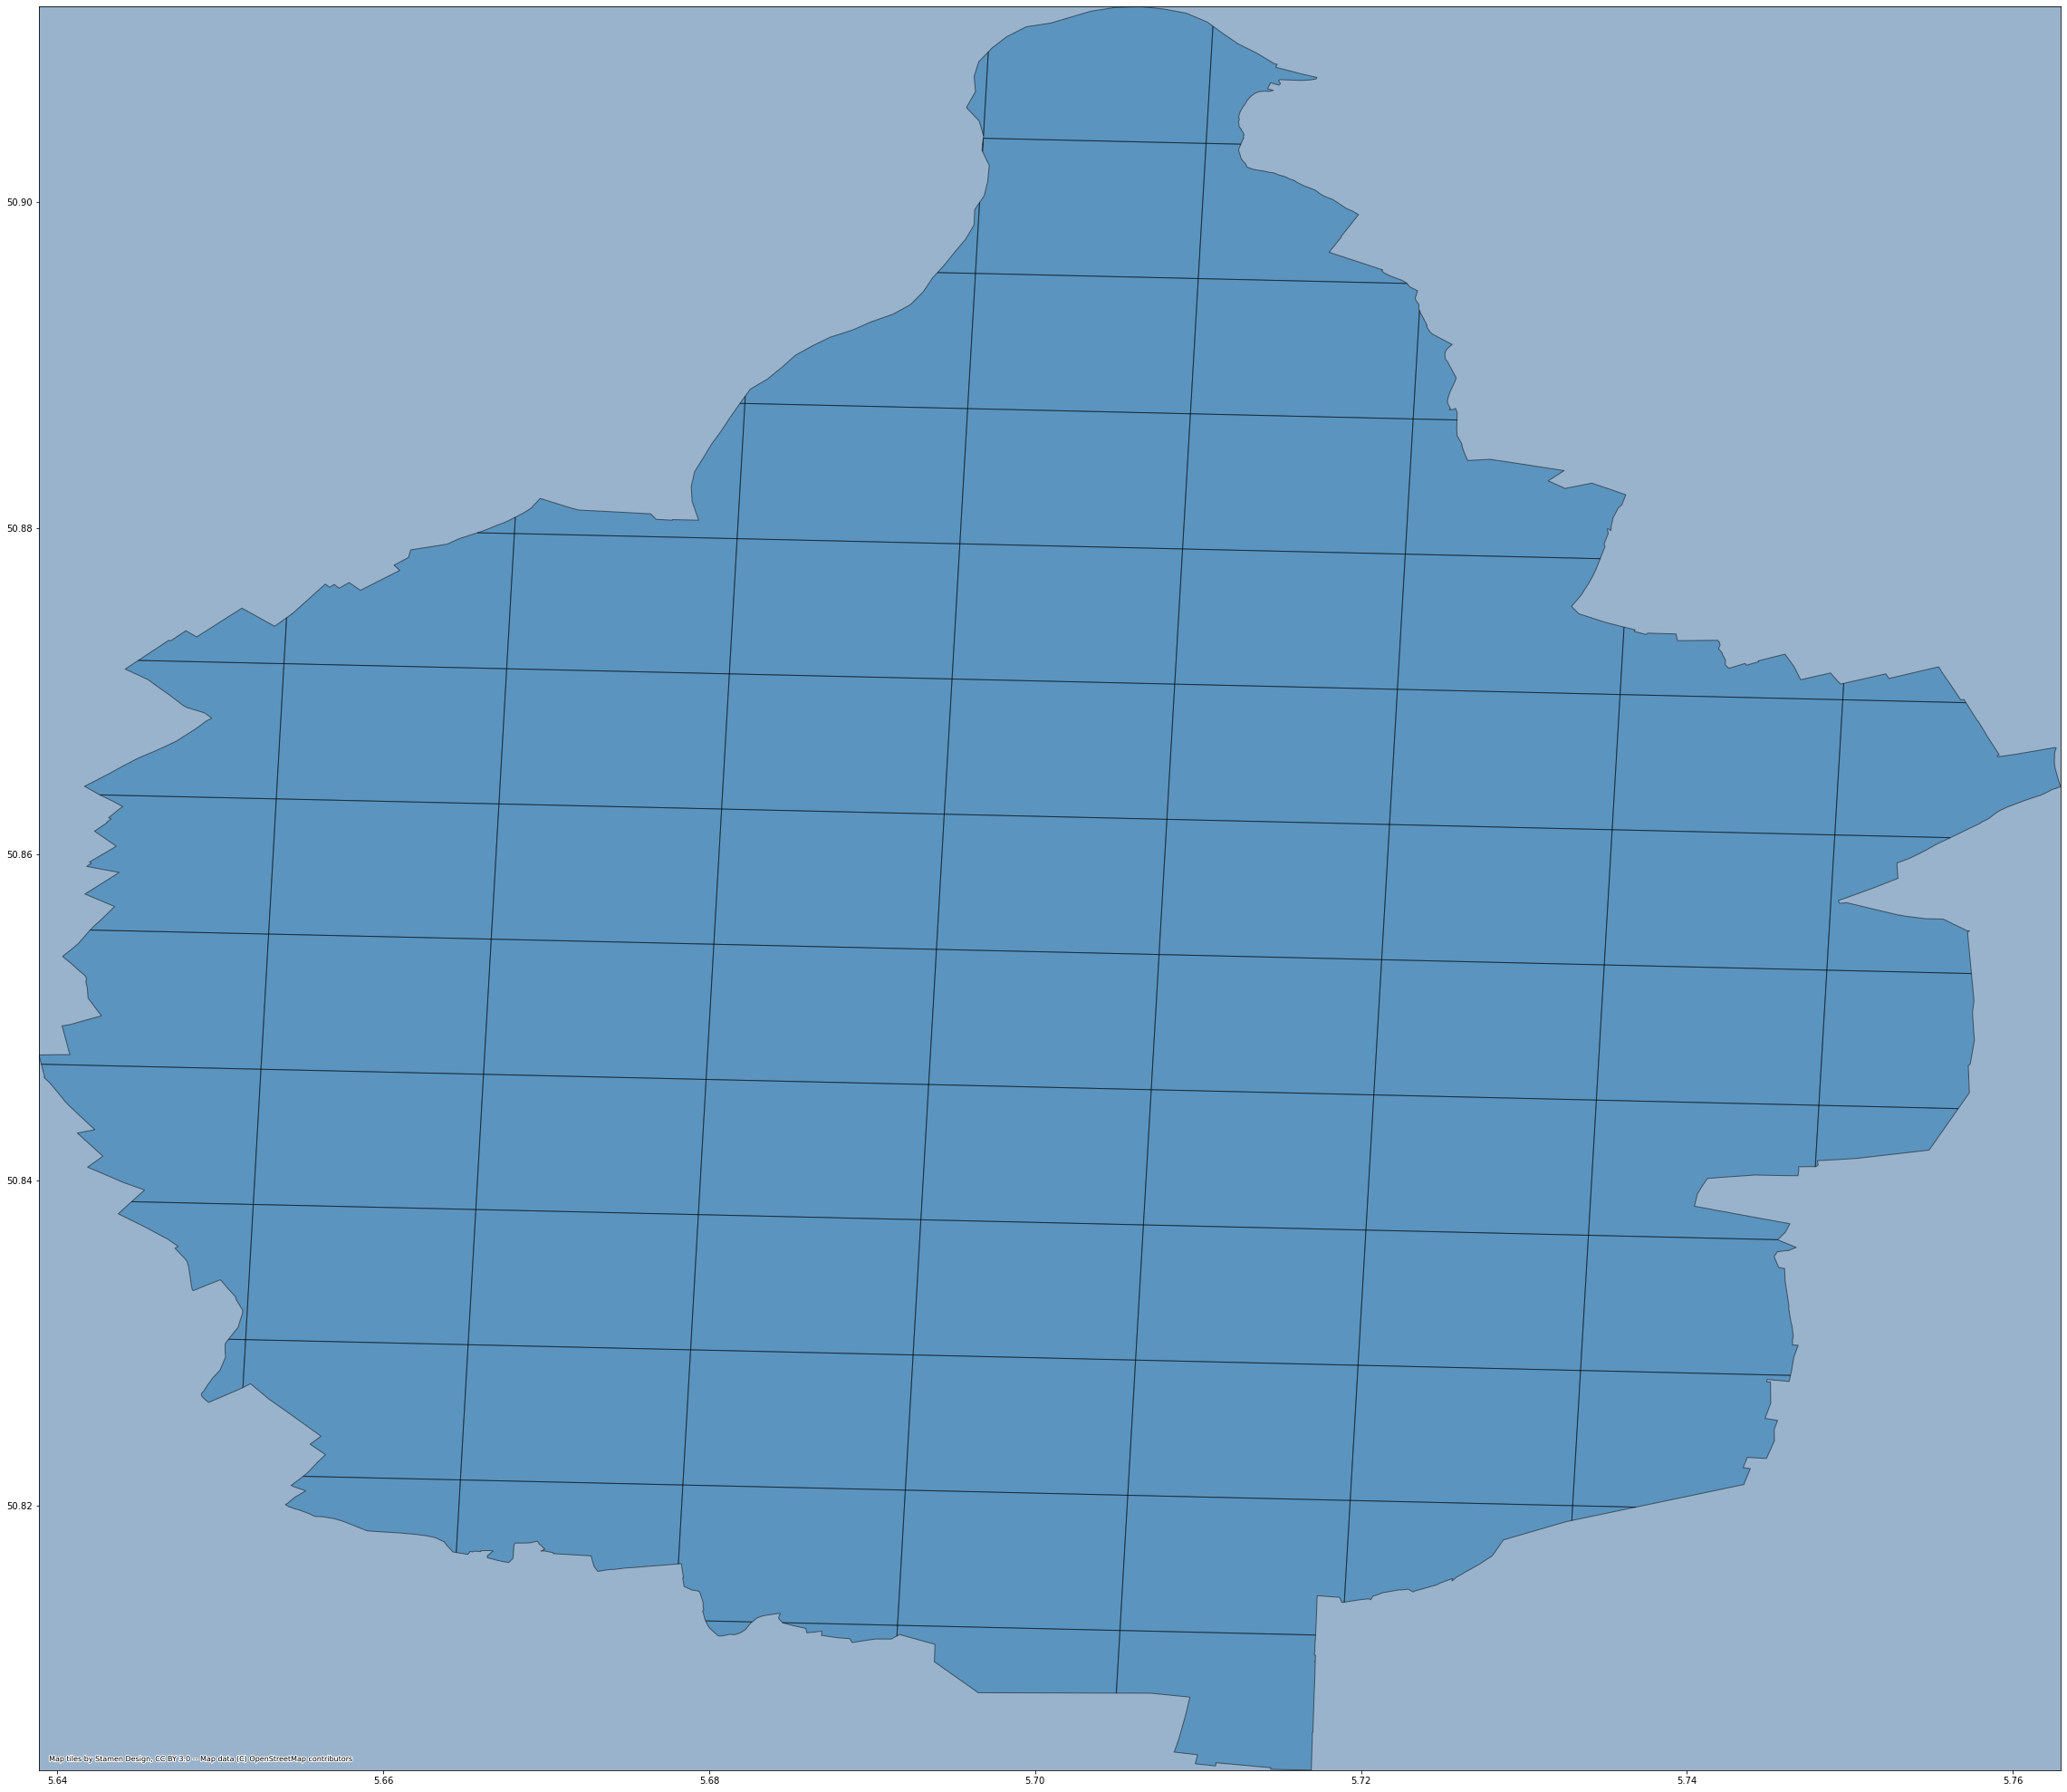

In [18]:
polyframe_4326 = polyframe.to_crs(epsg=4326)
west, south, east, north = polyframe_4326.unary_union.bounds

ax = polyframe_4326.plot(figsize=(40,40), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom = 13)
ax.set_xlim(west, east)
ax.set_ylim(south, north)

In [16]:
l = len(polylist)
OD_matrix = np.zeros(shape=(l,l))
print (OD_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
